# BUSINESS UNDERSTANDING
## Introduction
The real estate market is a dynamic and complex field influenced by numerous factors that affect property values. Predicting house prices accurately is crucial for buyers, sellers, real estate agents, and investors to make informed decisions. This project aims to develop a linear regression model to predict house prices using a variety of independent variables, including physical attributes of the properties, location-based features, and other relevant factors. By leveraging data analysis and machine learning techniques, this project seeks to provide a robust tool for estimating property values, thereby enhancing decision-making processes in the real estate sector.

## Problem Statement
Accurately predicting house prices is a significant challenge due to the multitude of variables that can influence property values. Traditional methods often fail to capture the complexity and interactions between different factors, leading to less reliable predictions. This project addresses the problem of developing a reliable and accurate predictive model for house prices using linear regression, incorporating a comprehensive set of independent variables to improve prediction accuracy.

## Objectives
### Explore the Relationship Between Property Size and Housing Prices:

Investigate how the size of a house correlates with price. Determine if larger properties command higher prices, aiding real estate investors in valuation strategies.

### Develop a Linear Regression Model to Predict Housing Prices:

Build and evaluate a linear regression model using features bedrooms,bathrooms,sqft_living,grade,condition,sqft_lot,floors,waterfront,yr_built. Provide stakeholders with a predictive tool for estimating housing prices and supporting strategic decision-making in urban development.


# DATA UNDERSTANDING

In [1]:
#imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

In [2]:
import pandas as pd
df = pd.read_csv("data\kc_house_data.csv") # Read the data stored in kc_house_data.csv
df.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
df['grade'].value_counts()

7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64

In [4]:
df.columns # Accesses columns in our dataset

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

# Column Names and descriptions for Kings County Data Set
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

# EDA & DATA CLEANING

In [5]:
df.shape

(21597, 21)

- Number of Rows (Observations): There are 21597 rows in the DataFrame.
- Number of Columns (Variables): There are 21 columns (or variables) in the DataFrame.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [7]:
df.describe() # Data Description of Numerical columns

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


- We drop columns that are not that relevant in helping us come up with the models

In [8]:
df = df.drop(['id','date','view','sqft_above','sqft_basement','yr_renovated','zipcode','lat','long','sqft_living15','sqft_lot15'], axis=1)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
0,221900.0,3,1.00,1180,5650,1.0,NaN,3,7,1955
1,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,1951
2,180000.0,2,1.00,770,10000,1.0,0.0,3,6,1933
3,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1965
4,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1987


In [9]:
df.isna().sum() #Check for columns with null values

price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront     2376
condition         0
grade             0
yr_built          0
dtype: int64

In [10]:
df['waterfront'].isna().value_counts()

False    19221
True      2376
Name: waterfront, dtype: int64

In [11]:
#Impute the missing values in the waterfront column with mean
df['waterfront'].fillna(df['waterfront'].mean(), inplace=True)

In [12]:
df.isna().sum() # Recheck for null values

price          0
bedrooms       0
bathrooms      0
sqft_living    0
sqft_lot       0
floors         0
waterfront     0
condition      0
grade          0
yr_built       0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21597 non-null  float64
 1   bedrooms     21597 non-null  int64  
 2   bathrooms    21597 non-null  float64
 3   sqft_living  21597 non-null  int64  
 4   sqft_lot     21597 non-null  int64  
 5   floors       21597 non-null  float64
 6   waterfront   21597 non-null  float64
 7   condition    21597 non-null  int64  
 8   grade        21597 non-null  int64  
 9   yr_built     21597 non-null  int64  
dtypes: float64(4), int64(6)
memory usage: 1.6 MB


In [14]:
df.corr() # Checked how diifferent independent variables relate to price

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
price,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.264116,0.036056,0.667951,0.053953
bedrooms,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002257,0.026496,0.356563,0.155670
bathrooms,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.063522,-0.126479,0.665838,0.507173
sqft_living,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.104492,-0.059445,0.762779,0.318152
sqft_lot,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021519,-0.008830,0.114731,0.052946
floors,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.020662,-0.264075,0.458794,0.489193
waterfront,0.264116,-0.002257,0.063522,0.104492,0.021519,0.020662,1.000000,0.016636,0.082633,-0.024610
condition,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.016636,1.000000,-0.146896,-0.361592
grade,0.667951,0.356563,0.665838,0.762779,0.114731,0.458794,0.082633,-0.146896,1.000000,0.447865
yr_built,0.053953,0.155670,0.507173,0.318152,0.052946,0.489193,-0.024610,-0.361592,0.447865,1.000000


- The correlation between price and bedrooms has a coefficient of 0.308787, indicating a moderate positive relationship. As the number of bedrooms increases, the price of the house tends to increase, but the relationship is not very strong.
- The correlation between price and bathrooms has a coefficient of 0.525906, indicating a moderate to strong positive relationship. More bathrooms are associated with higher house prices.
- The correlation between price and Sqft_living has a coefficient of 0.701917, indicating a strong positive relationship. Houses with larger living areas (square footage) tend to be more expensive.
- The correlation between price and sqft_lot has a coefficient of 0.089876, indicating a very weak positive relationship. The size of the lot has little impact on the house price.
- The correlation between price and floors has a coefficient of 0.256804, indicating a weak to moderate positive relationship. More floors are somewhat associated with higher house prices.
- The correlation between price and waterfront has a coefficient of 0.264306, indicating a weak to moderate positive relationship. Houses located on the waterfront tend to be more expensive.
- The correlation between price and condition has a coefficient of 0.036056, indicating an almost negligible positive relationship. The condition of the house has little to no impact on the price.
- The correlation between price and grade has a coefficient of 0.667951, indicating a strong positive relationship. Higher-grade houses (quality of construction and design) tend to be more expensive.
- The correlation between price and Yr_built has a coefficient of 0.053953, indicating a very weak positive relationship. The year the house was built has little impact on the house price.

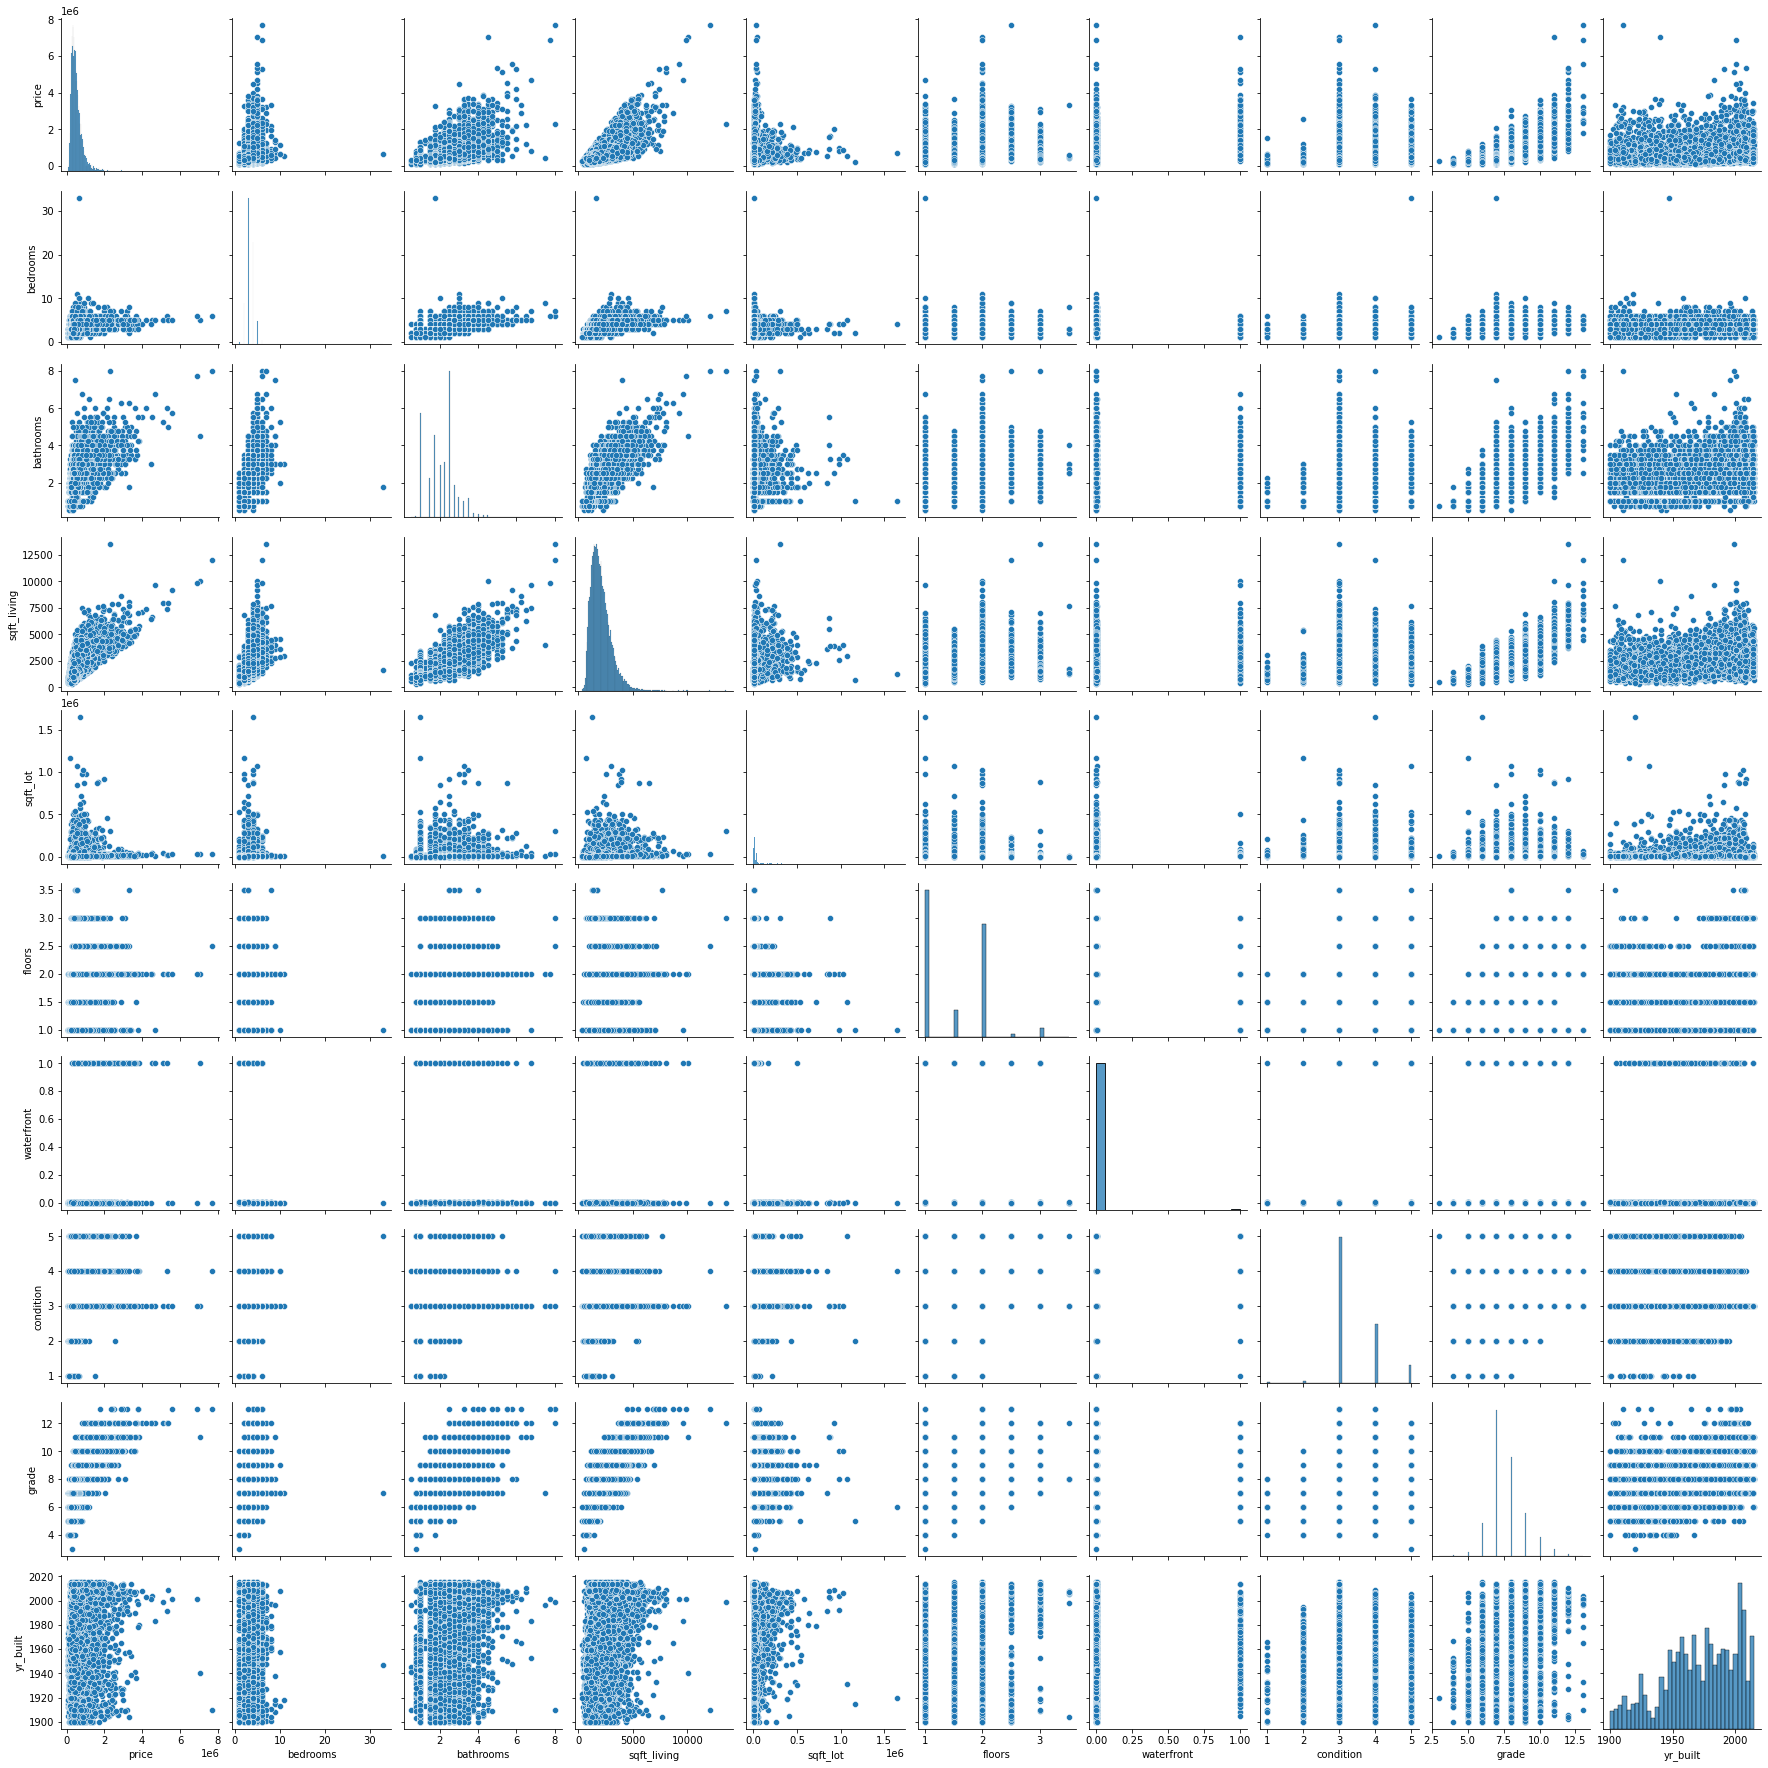

In [15]:
sns.pairplot(df)

## Check for any outliers

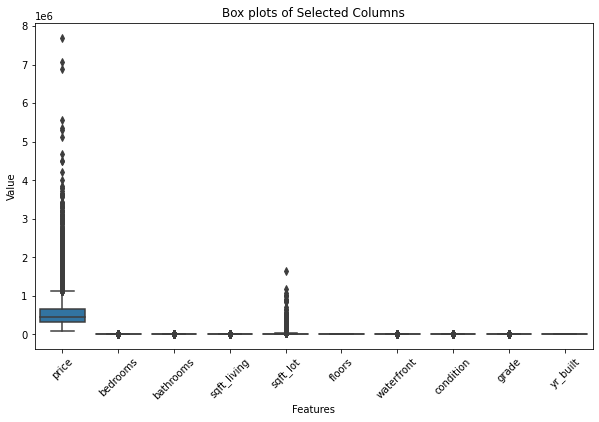

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title('Box plots of Selected Columns')
plt.xlabel('Features')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()

from this boxplot, outliers are present in every column apart from the Yr_built column.

### Get the Outliers

In [17]:
# Calculate IQR for selected columns
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = ((df < lower_bound) | (df > upper_bound)).any(axis=1)

# Print indices of outliers
outlier_indices = df.index[outliers]


In [18]:
# droping all columns with outliers 
df = df.drop(outlier_indices)
df.duplicated().sum()

7

In [19]:
df = df.drop_duplicates()
df.duplicated().sum()

0

## DATA ANALYSIS
## Analysis 1:
 How does the size of the house (sqft_living) compare to the price of the house?

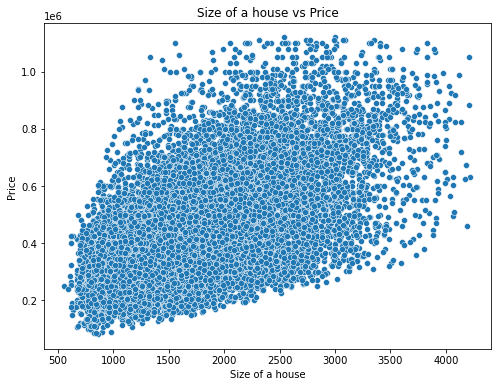

In [20]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='sqft_living', y='price', data=df)
plt.title('Size of a house vs Price')
plt.xlabel('Size of a house')
plt.ylabel('Price')
plt.show()

Trend Observation:
The spread of data points suggests variability in prices for a given square footage. As the square footage of the living area increases, the price of the house also tends to increase.

Implication:
This suggests that the larger the size of the house, the higher the price.

## Analysis 2:
What is the impact of the quality of construction  and design of a house(grade) on the price of the house?

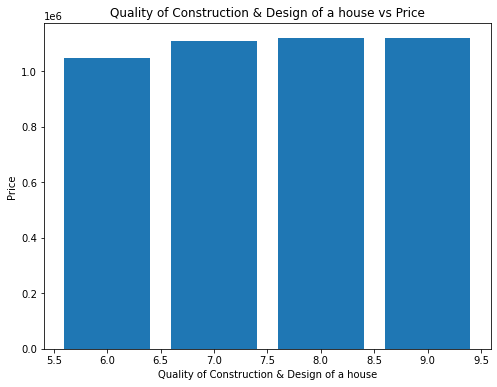

In [21]:
plt.figure(figsize=(8, 6))
plt.bar(df['grade'], df['price'])
plt.title('Quality of Construction & Design of a house vs Price')
plt.xlabel('Quality of Construction & Design of a house')
plt.ylabel('Price')
plt.show()

<AxesSubplot:>

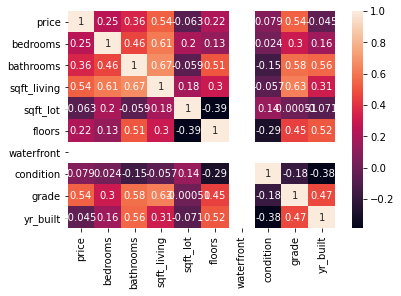

In [22]:
sns.heatmap(data=df.corr(),annot=True)

from this bar chart, as the grade of construcion increases the price of the house also increase. Though it reaches a certain grade and plateaus. But from the correlation matrix, we can clearly say, higher-grade houses (quality of construction and design) tend to be more expensive.

## Modeling

Simple linear regression modelling

- Since sqft_living has the highest correlation to price, we'll use it in formulating our simple linear regression model. There's also some sort of linearity between the two variables


In [23]:
x= df['sqft_living']
y=df['price']

In [24]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2,random_state=42)


In [25]:
x_train = np.array(x_train).reshape(-1, 1)
x_test = np.array(x_test).reshape(-1, 1)

In [26]:
scaler = StandardScaler() # Scale our data
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


## Modeling

In [27]:
model = LinearRegression()
model.fit(x_train_scaled,y_train) # Here we train our model
y_pred = model.predict(x_test_scaled)

In [28]:
df_lin = pd.DataFrame({"true":y_test,"pred":y_pred})
df_lin.head()

,true,pred
7828,725000.0,547274.789564
5249,349000.0,564904.215487
11666,359000.0,505605.237381
19768,679950.0,513618.612801
8427,302100.0,443100.909107


## Validation
validating the simple linear model performance

In [29]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
r2  = r2_score(y_test,y_pred)

print("mse",mse)
print("mae",mae)
print("R2" ,r2)

mse 26122766209.73261
mae 130539.01055182047
R2 0.2676546813415507


## Multiple Linear Regression Model

In this, well use a 2 different sets of predictor variables and come up whith 2 different models.

In [37]:
X1 = df[['bedrooms','bathrooms','sqft_living','grade']]
X2 = df[['condition','sqft_lot','floors','waterfront','yr_built']]
X3 = df[['bedrooms','bathrooms','sqft_living','grade','condition','sqft_lot','floors','waterfront','yr_built']]
y = df['price']


In [38]:
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

In [39]:
model_1 = LinearRegression()
model_1.fit(X1_train,y_train)

LinearRegression()

In [40]:
y_predict= model_1.predict(X1_test)

In [41]:
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_predict)}")
print(f"R-squared: {r2_score(y_test, y_predict)}")

Mean Absolute Error: 119090.41696353848
R-squared: 0.36662860111140305


In [42]:
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=42)
model_2 = LinearRegression()
model_2.fit(X2_train,y_train)
y_predict= model_2.predict(X2_test)
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_predict)}")
print(f"R-squared: {r2_score(y_test, y_predict)}")

Mean Absolute Error: 143112.44958523367
R-squared: 0.09805035581051247


In [44]:
X3_train, X3_test, y_train, y_test = train_test_split(X3, y, test_size=0.2, random_state=42)
model_3 = LinearRegression()
model_3.fit(X3_train,y_train)
y_predict= model_3.predict(X3_test)
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_predict)}")
print(f"R-squared: {r2_score(y_test, y_predict)}")

Mean Absolute Error: 102758.91484138957
Mean Squared Error: 17444471780.694435
R-squared: 0.5109485288621063


## Conclusion
### Objective 1:
Explore the Relationship Between Property Size and Housing Prices
Conclusion:

Findings: The analysis reveals a strong positive correlation (r = 0.701917) between sqft_living (measured by footage of a house) and housing prices (price). Larger houses in terms of sqft_living tend to command higher prices.
Implications: This correlation suggests that property size significantly influences housing prices, guiding decisions for real estate investors and homebuyers regarding property valuation and market positioning.

## Objective 2:
Develop a Linear Regression Model to Predict Housing Prices
Conclusion:

Findings: The linear regression model, incorporating features bedrooms,bathrooms,sqft_living,grade,condition,sqft_lot,floors,waterfront,yr_built achieves an R-squared (R2) score of 0.51 on the test set. This indicates that 51% of the variance in housing prices (price) can be explained by these predictors.
Implications: Stakeholders can utilize this model for predicting housing prices based on property characteristics. It supports informed decision-making in real estate investments, pricing strategies, and urban development planning.

## Recomedations
### Enhance Property Valuation Strategies:
Use house footage of a house(sqft_living) to refine property valuation models, reflecting higher prices for larger properties.
